**Build the Model**

Once you have clear data and a good understanding of how each attribute relates to each other. You are ready to move on to the next step that is building the model. Model building is basically part of *Machine Learning*. *Machine learning* models have the ability to learn from the data automatically and improve its outcome without human intervention. Depending on the type of questions you want to answer there are many different types of modeling algorithms available. 
*Machine Learning* is basically divided into two types Supervised and Unsupervised Learning. 
- Supervised learning involves modelling labelled data, labelled data have predefined classes in which objects are assigned.
An example which can clarify it more is- categoriziging email as spam and not spam. If you notice Gmail ask you to classify email as spam or not this is labellng data and later with the same Gmail itself predicts spam emails for you. Similarly, you can have labelled data as per the domain you are working.  I hope you have got an understanding what is labelled data.
Once model is build it can be used to predict values from unknown and unlabelled data. Further techniques in suprevised machine learning are classigication to classify discrete categories, the above example of classifying email as spam or not is an example of classification.
Another is regression that works on continuous data values. We will understand Regression in more detail in this section.

- Another machine learning algorithm is unsupervised learning, as the name suggest it works on unlabelled data, data which doesn't have predefined classes/labels. It can be further categorize into- Clustering which group objects on the basis of similiratities and Association which finds relationships between the attributes in the dataset. Market Basket Analysis is an example of association. Some other unsupervised algorithms are Neural networks, Apriori algorithm etc.




To move with *Data Modelling*: 

- *first* find out what you question you want to answer. Acoording to that identify the modelling technique and attributes that you will fed the model.
- *Second* Generate the model.
- *Third* Compare the generated models.

Now, let's move with data modelling with the market data. The aim is to find out "Quantity" to be sold to generate a particular amount of revenue "Gross Income". Thus, this is a regression problem. You must have learned about regression in your mathematics or statistics class.

The formula for regression is : `y=mx+c`
*where m is slope, c is the intercept, y is dependent variable and x is independent  variable.* 


You can choose different as per the insight you want to get from data. One problem n the same dataset could be to classify customers on the basis of their contribution in the revenue geeration of the company. This is a curicial step to understand your regular customers and retain them. For this problem, you'll first have to label the data and then further on the labelled data generate classification model that can be used further for unknown dataset.




Keeping that aside, let's import libraries required for data modelling,for regression we will use the library Scikit-learn. This is the library used majorly for machine learning in python. It also contain few inbuilt dataset that you can work on. 

In [ ]:
 # Libraries required
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statistics as st
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pandas is a library for data manipulation and analysis
import pandas as pd
import numpy as np
#reading dataset
df = pd.read_csv("/content/supermarket_sales.csv")
#check dataset
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#change date column to datetime as it is taken as object
df['Date'] = pd.to_datetime(df['Date'])
#lets check Dtype of column date
print(df['Date'].dtype)

datetime64[ns]


As, we are moving with *Linear Regression*, first is to choose one independent variable and one dependent variable. As per our aim to identify "Quantity" on the basis of revenue "Gross Income". Hence, dependent variable is *Quantity* and independent variable is *Gross Income*.

In [ ]:
#Subsetting data for Linear Regression
x = df[['gross income']]
y = df ['Quantity']

Once x and y variables are identified, split them into training and testing data. Training data is over which data would be trained and testing data is over which fit model would be tested. Here, We are splitting data on 80:20 split. Make sure that your data is large enough to get good meaningful results. Also, test and training set should belong to the same dataset. 

In [ ]:
#Splitting data into test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#shape of the training and testing data
print("training data:",x_train.shape)
print("testing data:",x_test.shape)

training data: (800, 1)
testing data: (200, 1)


In [ ]:
#fit model
data = LinearRegression( )  
data.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Model Slope:",data.coef_)

Model Slope: [0.17693728]


In [ ]:
print("Model intercept:",data.intercept_)

Model intercept: 2.7736610470448335


In [ ]:
#predict
y_pred = data.predict(x_test)


In [ ]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
993,10,4.320978
859,9,6.566046
298,4,4.897262
553,6,3.952594
672,3,4.722006
971,7,5.059425
27,2,4.324870
231,3,3.054726
306,7,5.265026
706,4,4.295322


In [ ]:
print("Actual Quantity:",y_test.sum())
print("Predicted Quantity:",y_pred.sum())

Actual Quantity: 1109
Predicted Quantity: 1093.84480402307


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6160936307749183
Mean Square Error: 4.039677805235893
Root Mean Square Error: 2.009894973682927


In [ ]:
from sklearn.metrics import r2_score
print('coefficient of determination(R-Square of the model):', r2_score(y_test, y_pred))

coefficient of determination(R-Square of the model): 0.5090313466878675


In [ ]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

5.828534421434526

Now, let's try out Multiple linear regression Model. In Multiple linear regression, you can choose more than one dependent variable.

The equation for multiple linear regression looks like-
`y=m1x1+m2x2...+m(n)x(n)+c`

In [ ]:
 # subsetting variables
new = df[['Branch','Product line','Unit price', 'Quantity','gross income']]

In [ ]:
# Create a set of dummy variables from the categorical variables
new1=pd.get_dummies(new, columns=['Branch','Product line'])
new1.columns


Index(['Unit price', 'Quantity', 'gross income', 'Branch_A', 'Branch_B',
       'Branch_C', 'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel'],
      dtype='object')

In [ ]:
X = new1[['Unit price', 'gross income',
        'Branch_A', 'Branch_B','Branch_C', 'Product line_Electronic accessories',
        'Product line_Fashion accessories', 'Product line_Food and beverages',
        'Product line_Health and beauty', 'Product line_Home and lifestyle','Product line_Sports and travel']]



In [ ]:
x_ = new1[['Unit price', 'gross income',
        'Branch_A', 'Branch_B','Branch_C', 'Product line_Electronic accessories',
        'Product line_Fashion accessories', 'Product line_Food and beverages',
        'Product line_Health and beauty', 'Product line_Home and lifestyle','Product line_Sports and travel']].values
        
y_ =  new1['Quantity'].values

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_, y_, test_size=0.2, random_state=0)

In [ ]:
#Generate model
data_reg = LinearRegression()  


In [ ]:
# fit model
results=data_reg.fit(train_x, train_y)

In [ ]:
#predict
pred_y = data_reg.predict(test_x)

In [ ]:
new_df= pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})
NW = new_df.head(15)
new_df.head(10)

,Actual,Predicted
0,10,6.644509
1,9,7.926120
2,4,4.119328
3,6,5.738307
4,3,2.860868
5,7,6.247536
6,2,0.964683
7,3,5.258493
8,7,6.473455
9,4,4.675414


In [ ]:
print("Actual Quantity:",test_y.sum())
print("Predicted Quantity:",pred_y.sum())

Actual Quantity: 1109
Predicted Quantity: 1117.5342425481858


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))

Mean Absolute Error: 0.8892876819154968
Mean Squared Error: 1.5345063051340884
Root Mean Squared Error: 1.2387519142806958


In [ ]:
print("coefficient of determination (R-Square of the model):",r2_score(test_y, pred_y))

coefficient of determination (R-Square of the model): 0.8135013408361003


In [ ]:
max_error(test_y, pred_y)

3.5648907017768536

Let's try out Random Forest :

In [ ]:
#importing libraries for random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std




In [ ]:
#Generating Model
model = RandomForestRegressor(random_state = 1)
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)
n_scores = cross_val_score(model, train_x, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')



In [ ]:
# model performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.164 (0.025)


In [ ]:
# model fit
model.fit(train_x,train_y)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
#predict value
predicted_value = model.predict(test_x)

In [ ]:
new_df= pd.DataFrame({'Actual': test_y, 'Predicted': predicted_value})
NW = new_df.head(15)
new_df.head(10)

,Actual,Predicted
0,10,9.57
1,9,8.97
2,4,4.09
3,6,6.14
4,3,3.34
5,7,6.83
6,2,2.00
7,3,2.40
8,7,6.97
9,4,3.91


In [ ]:
print("Actual Quantity:",test_y.sum())
print("Predicted Quantity:",predicted_value.sum())

Actual Quantity: 1109
Predicted Quantity: 1101.6799999999998


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predicted_value))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predicted_value))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y,predicted_value)))

Mean Absolute Error: 0.15119999999999997
Mean Squared Error: 0.05467999999999999
Root Mean Squared Error: 0.23383755044902432


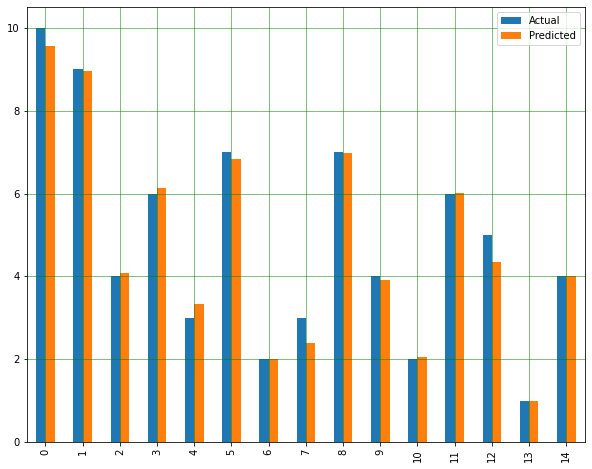

In [ ]:
NW.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Model Comparison:

We have created three different models: 

1. Linear regression mode with Mean Absolute Error: 1.16 and
Root Mean Square Error(RMSE): 2.01.
2. Multiple linear regression with Mean Absolute Error: 0.89 and Root Mean Squared Error: 1.24.
3. Random Forest regression with Mean Absolute Error: 0.15 and Root Mean Squared Error: 0.23.

The lower the error values, better is the model. Hence, model with Random forest regression is the best model out of the three. We can even work more, adjust values to make it better. Also, the more better quantity and quality of the dataset to train, much better would be the model.

This is how, you can work with python.